<a href="https://colab.research.google.com/github/vinayak2019/UK_Bootcamp/blob/main/2023/Exercises/Bootcamp_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Get data from GitHub
! wget https://raw.githubusercontent.com/vinayak2019/UK_Bootcamp/main/2023/Exercises/UK_bootcamp_23.csv

--2023-07-18 02:47:41--  https://raw.githubusercontent.com/vinayak2019/UK_Bootcamp/main/2023/Exercises/UK_bootcamp_23.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22607 (22K) [text/plain]
Saving to: ‘UK_bootcamp_23.csv’

UK_bootcamp_23.csv  100%[===================>]  22.08K  --.-KB/s    in 0s      

2023-07-18 02:47:41 (98.8 MB/s) - ‘UK_bootcamp_23.csv’ saved [22607/22607]



In [2]:
# import pandas and mathplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# create dataframe
df = pd.read_csv("UK_bootcamp_23.csv")
df

,First_Name,Last_Name,Major,Education,Is_researcher,Is_programmer
0,Simran,Vivanco,"Anthropology, Digital Mapping",Undergraduate,"Yes - If yes, please describe your research in...",No
1,GYeon,Stringer,Computer Science,Graduate,No,"Yes - If yes, which language(s)"
2,Augustine,Maras,Public Health,Graduate,"Yes - If yes, please describe your research in...",No
3,Leah,Kurra,"Neuroscience, Psychology",Graduate,No,"Yes - If yes, which language(s)"
4,Renee,Baustert,computer science,Graduate,"Yes - If yes, please describe your research in...","Yes - If yes, which language(s)"
...,...,...,...,...,...,...
227,Sara,Rahman,molecular Biology,Staff,No,"Yes - If yes, which language(s)"
228,Mark,Winstead,Biology,Graduate,No,"Yes - If yes, which language(s)"
229,Luke,Soulama,High school / Steam academy,Graduate,No,"Yes - If yes, which language(s)"
230,Laura,Rahman,Software engineering,Undergraduate,No,"Yes - If yes, which language(s)"


# Education

In [25]:
# This groups data by Education and for each group counts the entries under Education column
education = df.groupby("Education").agg({"Education":"count"})
education

,Education
Education,
Graduate,131
High school,27
Staff,1
Undergraduate,73


In [26]:
# Get X and Y for bar plot
x_education = education.index.values # The categories
y_education = education["Education"].values # counts

Text(0, 0.5, 'Count')

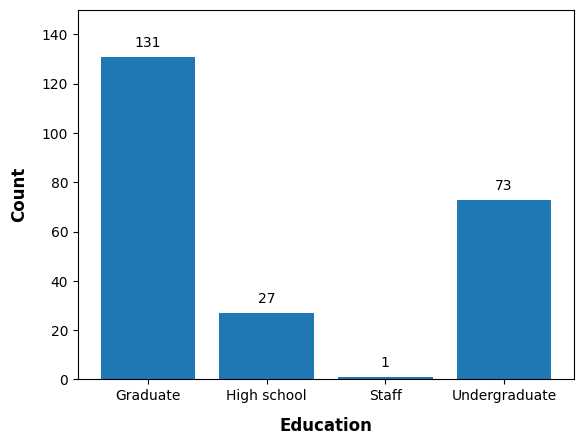

In [27]:
fig, ax = plt.subplots()
bars = ax.bar(x_education,y_education)
ax.bar_label(bars,padding=5)
ax.set_ylim(0,150)
ax.set_xlabel("Education",fontdict={"weight":"bold","fontsize":12},labelpad=10)
ax.set_ylabel("Count",fontdict={"weight":"bold","fontsize":12},labelpad=10)

# Coding experience

In [28]:
# This groups data by Education and for each group counts the entries under Education column
programmer = df.groupby("Is_programmer").agg({"Is_programmer":"count"})
programmer

,Is_programmer
Is_programmer,
No,81
"Yes - If yes, which language(s)",151


In [29]:
# Get X and Y for bar plot
x_program = programmer.index.values # The categories
y_program = programmer["Is_programmer"].values # counts

<ipython-input-30-5f3796d022ea>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["No","Yes"])


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

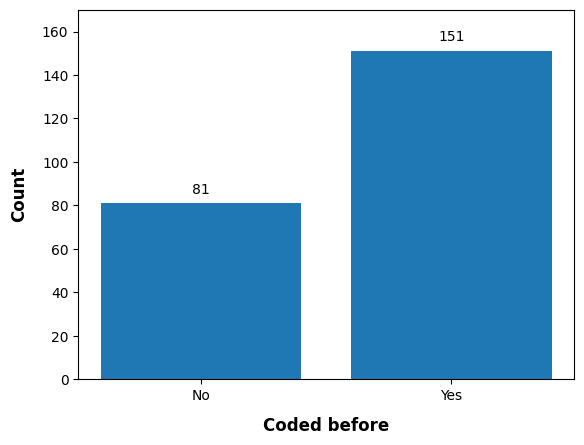

In [30]:
fig, ax = plt.subplots()
bars = ax.bar(x_program,y_program)
ax.bar_label(bars,padding=5)
ax.set_ylim(0,170)
ax.set_xlabel("Coded before",fontdict={"weight":"bold","fontsize":12},labelpad=10)
ax.set_ylabel("Count",fontdict={"weight":"bold","fontsize":12},labelpad=10)
ax.set_xticklabels(["No","Yes"])

<ipython-input-31-9439866e889a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(["No","Yes"])


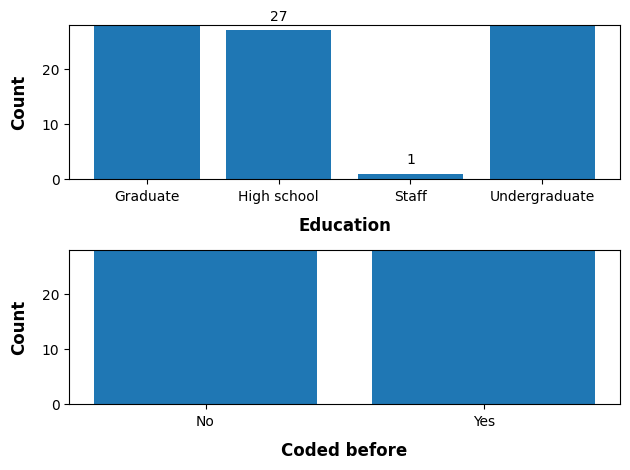

In [31]:

# combined plot
fig, ax = plt.subplots(2,1)
bars = ax[0].bar(x_education,y_education)
ax[0].bar_label(bars,padding=5)
ax[0].set_ylim(0,28)
ax[0].set_xlabel("Education",fontdict={"weight":"bold","fontsize":12},labelpad=10)
ax[0].set_ylabel("Count",fontdict={"weight":"bold","fontsize":12},labelpad=10)

bars = ax[1].bar(x_program,y_program)
ax[1].bar_label(bars,padding=5)
ax[1].set_ylim(0,28)
ax[1].set_xlabel("Coded before",fontdict={"weight":"bold","fontsize":12},labelpad=10)
ax[1].set_ylabel("Count",fontdict={"weight":"bold","fontsize":12},labelpad=10)
ax[1].set_xticklabels(["No","Yes"])
fig.tight_layout()

#Wordcloud

In [32]:
!pip install wordcloud

In [33]:
from wordcloud import WordCloud

In [34]:
# Get all major values
majors = df["Major"].dropna().values
majors

array(['Anthropology, Digital Mapping', 'Computer Science',
       'Public Health', 'Neuroscience, Psychology', 'computer science',
       'BSEE, MBA', 'Computer Science', 'ICT', 'not in college',
       'Philosophy', 'Biology', 'Harp instructor', 'Computer Science',
       'Equine Science and Management', 'N/a', 'Information Systems',
       'Media Arts & Studies', 'Physics', 'Biology', 'IT', 'Biology',
       'Horticulture', 'PhD Pharmacology & Nutritional Sciences', 'na',
       'Kinesiology Health Promotion - Biomechanics',
       'Psychology, Management', 'Biochemistry', 'Public Health',
       'Physics', 'Biosystems & Ag Engineering', 'biochemistry',
       'Linguistics', 'Marketing', 'Mechanical Engineering', '.',
       'Mathematics, Environmental Studies and Sustainability',
       'Economics', 'Computer Science', 'math', 'ME', 'Biochemistry',
       'Geology', 'Chemical Engineering', 'Biology', 'Nursing', 'none',
       'BSc, MBA', 'ICT', 'Economics', 'Neuroscience', 'Epidemi

In [35]:
# combine the word to form text
text = ""

for major in majors:
  text += "_".join(major.strip().split()) + " " # replace space beteen major with _

text

'Anthropology,_Digital_Mapping Computer_Science Public_Health Neuroscience,_Psychology computer_science BSEE,_MBA Computer_Science ICT not_in_college Philosophy Biology Harp_instructor Computer_Science Equine_Science_and_Management N/a Information_Systems Media_Arts_&_Studies Physics Biology IT Biology Horticulture PhD_Pharmacology_&_Nutritional_Sciences na Kinesiology_Health_Promotion_-_Biomechanics Psychology,_Management Biochemistry Public_Health Physics Biosystems_&_Ag_Engineering biochemistry Linguistics Marketing Mechanical_Engineering . Mathematics,_Environmental_Studies_and_Sustainability Economics Computer_Science math ME Biochemistry Geology Chemical_Engineering Biology Nursing none BSc,_MBA ICT Economics Neuroscience Epidemiology Finance Quantitative_and_Psychometric_Methods Ophthalmology Chemistry Plant_and_Soil_Sciences IcT BS_Equine_Science_&_Management Nursing Computer_Science N.A. Chemistry None Biology Anthropology Social_Work Computer_Science Animal_Science geology Ne

From [documentation](https://amueller.github.io/word_cloud/auto_examples/simple.html)

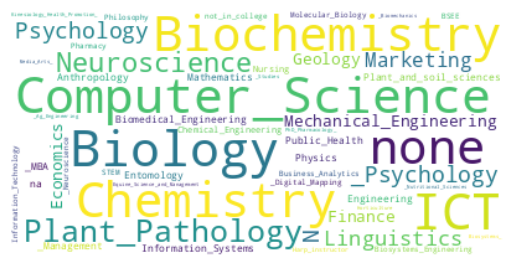

In [37]:
wordcloud = WordCloud(background_color="white",repeat=True).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()